In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [3]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.isna().sum()


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [14]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
X = dataset.drop('Profit', axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [7]:
y = dataset['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

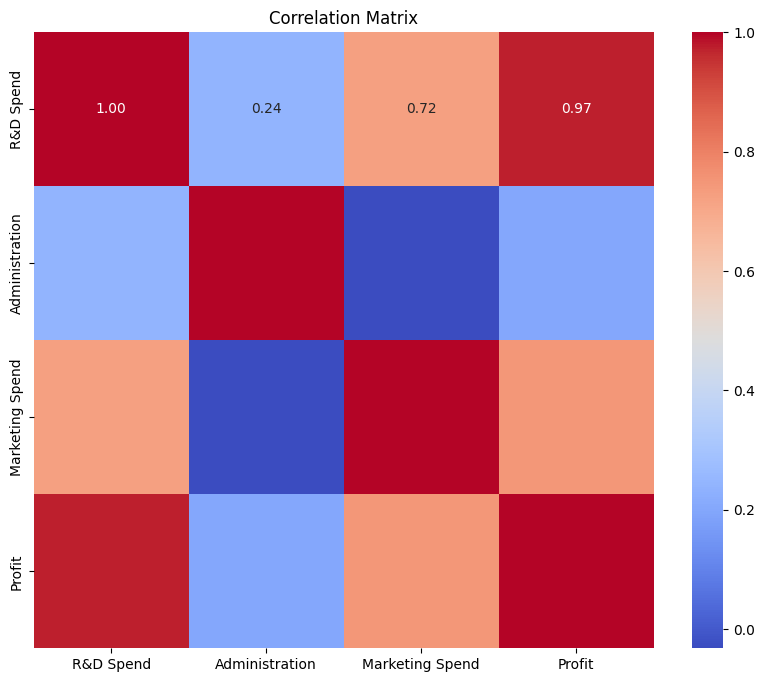

In [18]:
import seaborn as sns
dataset_numeric = dataset.drop(columns=['State'])
# Correlation Analysis
correlation_matrix = dataset_numeric.corr()
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [9]:
categorical_feature = ["State"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_feature)],
                                 remainder="passthrough")

transformed_X = transformer.fit_transform(X)

pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.25, random_state = 2509)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

regressor.score(X_test,y_test)

0.9840064291741403

In [12]:
y_pred = regressor.predict(X_test)

d = {'y_pred': y_pred, 'y_test': y_test}

pd.DataFrame(d)

,y_pred,y_test
32,98884.371543,97427.84
33,100047.235184,96778.92
47,47766.247901,42559.73
9,154976.558305,149759.96
37,91129.087779,89949.14
8,151755.926389,152211.77
23,112436.195860,108733.99
24,113375.898676,108552.04
17,130706.106786,125370.37
1,189141.730655,191792.06


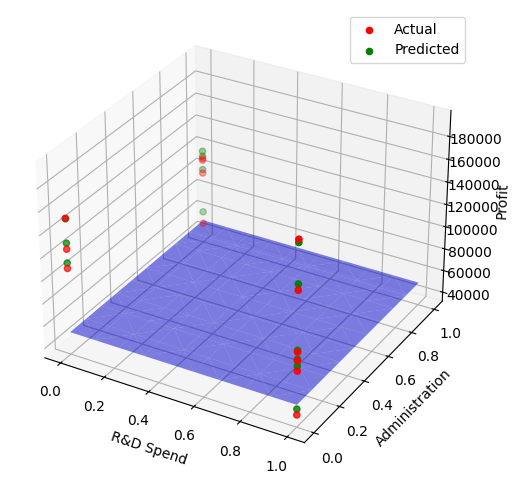

In [13]:
# Convert DataFrame columns to NumPy arrays for plotting
x_rd_spend = X_test[:, 0]  # Assuming 'R&D Spend' is the first column in X_test
x_administration = X_test[:, 1]  # Assuming 'Administration' is the second column in X_test
y_actual = y_test
y_predicted = y_pred

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot actual data points
ax.scatter(x_rd_spend, x_administration, y_actual, color='r', label='Actual')

# Plot predicted data points
ax.scatter(x_rd_spend, x_administration, y_predicted, color='g', label='Predicted')

# Plot the regression plane
xx, yy = np.meshgrid(np.linspace(x_rd_spend.min(), x_rd_spend.max(), 10),
                     np.linspace(x_administration.min(), x_administration.max(), 10))
zz = regressor.coef_[0] * xx + regressor.coef_[1] * yy + regressor.intercept_

#ax.plot_surface(xx, yy, zz, alpha=0.5, color='b')

ax.plot_trisurf(xx.flatten(), yy.flatten(), zz.flatten(), alpha=0.5, color='b')

# Set labels and legend

ax.set_xlabel('R&D Spend')
ax.set_ylabel('Administration')
ax.set_zlabel('Profit')
ax.legend()

plt.show()

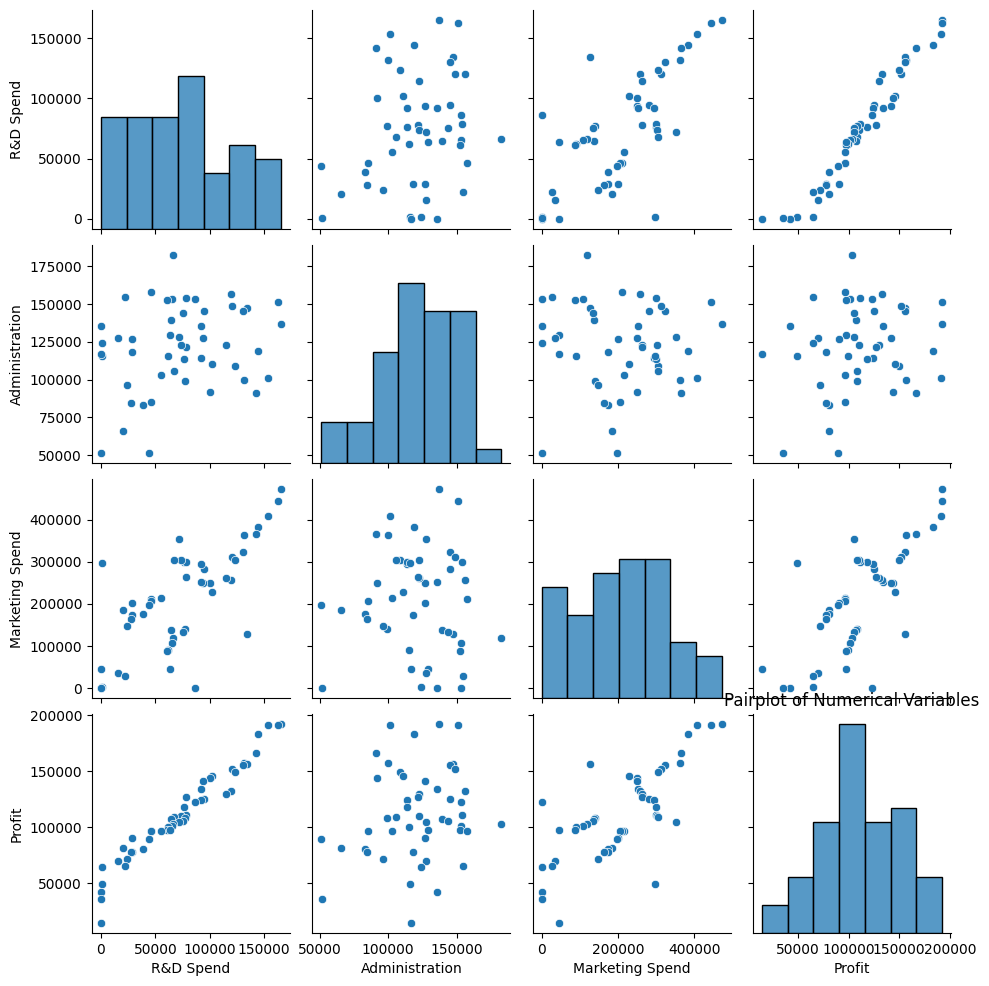

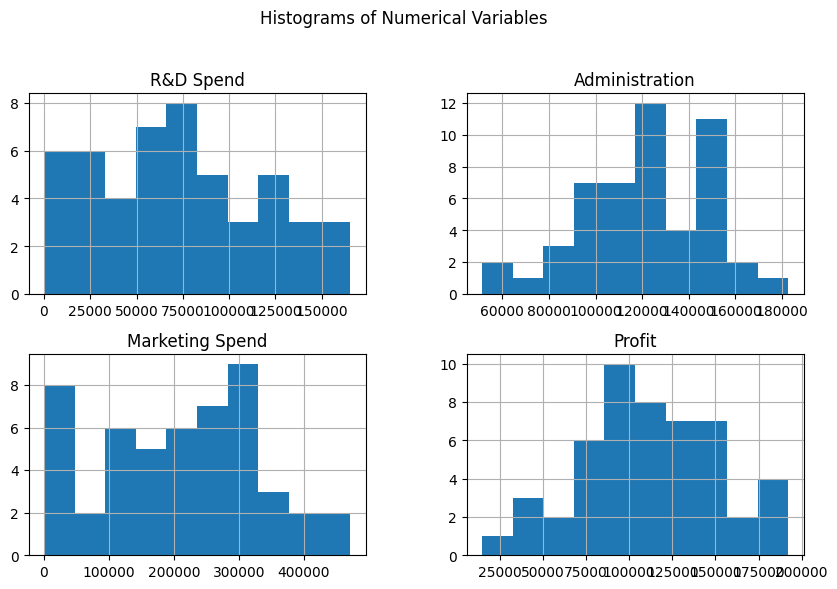

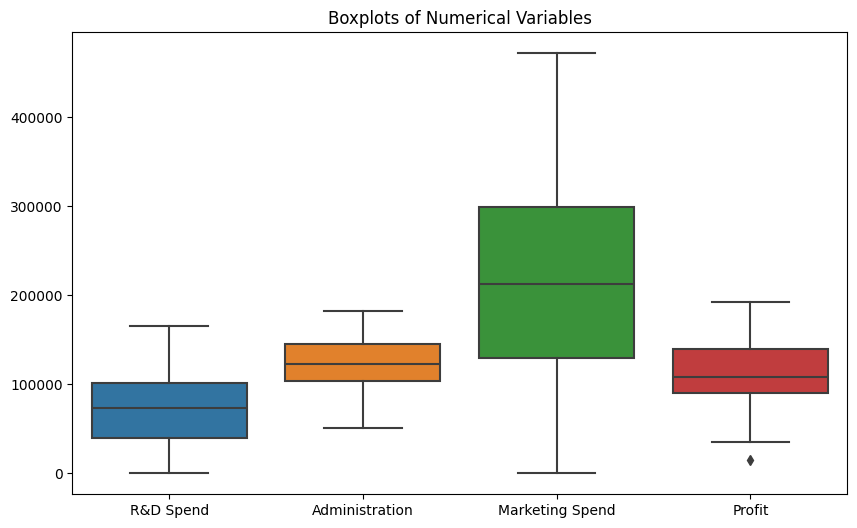

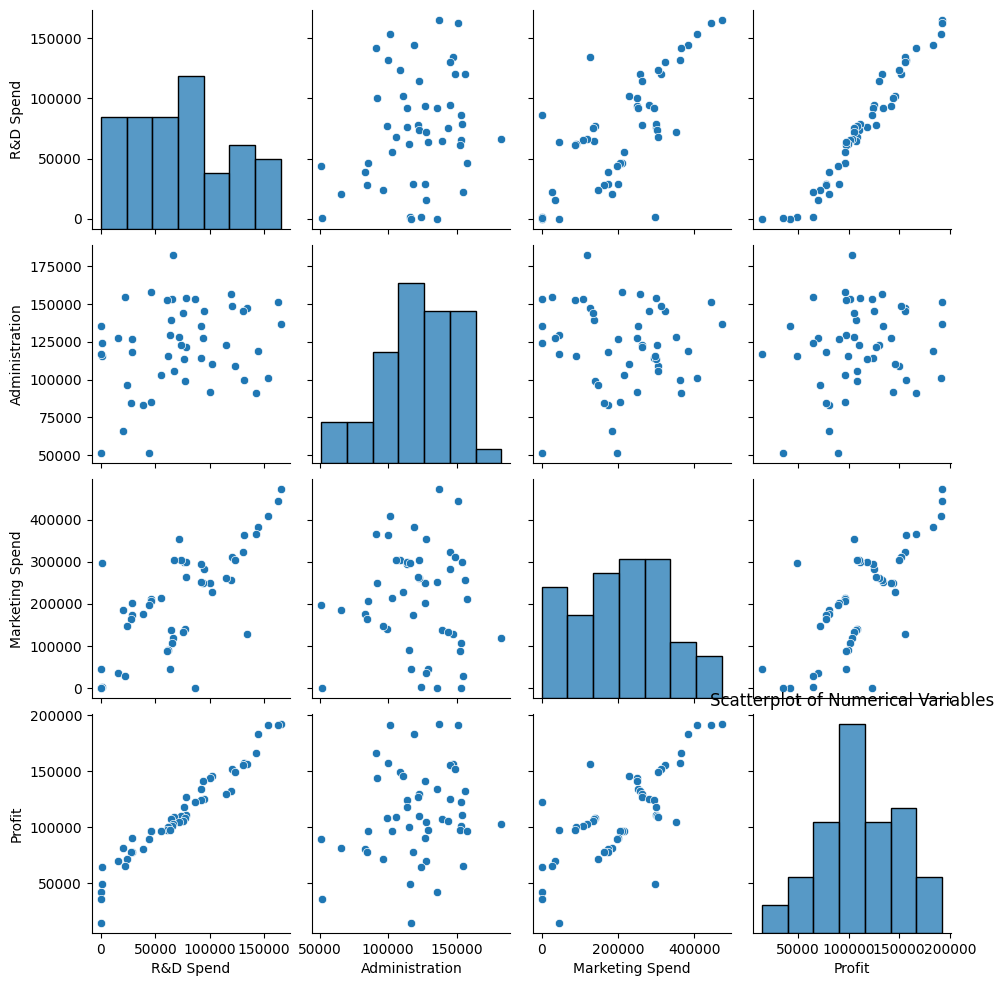

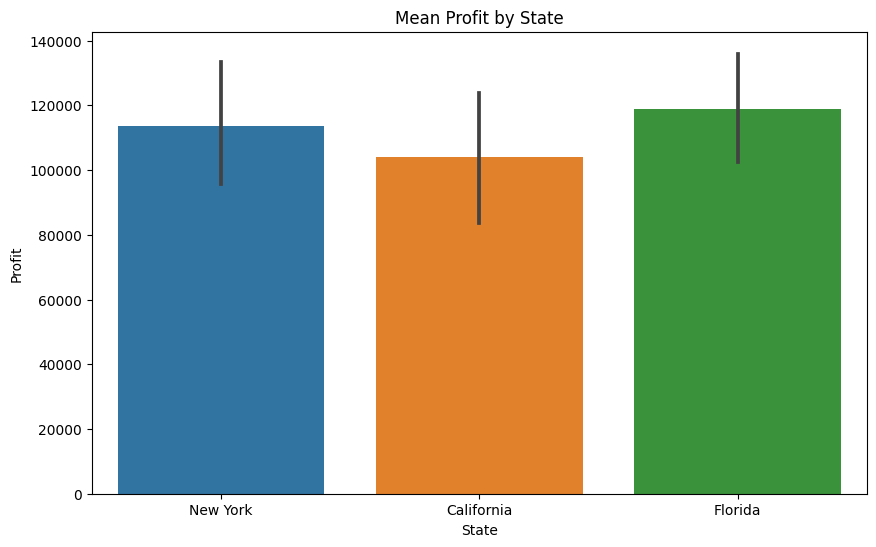

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Exclude the 'State' column for visualization
dataset_numeric = dataset.drop(columns=['State'])

# Pairplot
sns.pairplot(dataset_numeric)
plt.title("Pairplot of Numerical Variables")
plt.show()

# Histograms
dataset_numeric.hist(figsize=(10, 6))
plt.suptitle("Histograms of Numerical Variables", y=1.02)
plt.show()

# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset_numeric)
plt.title("Boxplots of Numerical Variables")
plt.show()

# Scatterplot
sns.pairplot(dataset_numeric, kind='scatter')
plt.title("Scatterplot of Numerical Variables")
plt.show()

# Bar plot (mean by State)
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Profit', data=dataset)
plt.title("Mean Profit by State")
plt.show()


